### Data cleaning process

In [166]:
# Check for missing data
# Check for duplicates
# Reset/change index

# Change price column
# Price data- cut $ out and ,

# Change area column
# Area data- cut out sqrt and ,

# Bedrooms data cut Beds
# Studio = 1 room

# Bathrooms cut baths

# Parking data- yes/no

# Convert all numbers to integers
# New column price/sqt
# Check for outliers 

# Save to excel

In [167]:
%pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Imports
import pandas as pd
import os
import xlrd
import seaborn as sns
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

### Merge datasets

In [2]:
# current work directory
path = os.getcwd()

# show all the files
files = os.listdir(path) 
files

['.cache',
 '.conda',
 '.condarc',
 '.continuum',
 '.dotnet',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.ms-ad',
 'Albuquerque.ipynb',
 'anaconda3',
 'AppData',
 'Application Data',
 'Austin.ipynb',
 'Boerne.ipynb',
 'Contacts',
 'Cookies',
 'Corpus Christi.ipynb',
 'Credit Card Fraud.ipynb',
 'Credit Card Fraudulent Data.ipynb',
 'Dallas.ipynb',
 'Data Cleaning.ipynb',
 'dataframe_albuquerque.xlsx',
 'dataframe_austin.xlsx',
 'dataframe_boerne.xlsx',
 'dataframe_corpus_christi.xlsx',
 'dataframe_dallas.xlsx',
 'dataframe_edinburg.xlsx',
 'dataframe_houston.xlsx',
 'dataframe_mcallen.xlsx',
 'dataframe_san_antonio.xlsx',
 'dataframe_san_diego.xlsx',
 'dataframe_san_marcos.xlsx',
 'dataframe_weslaco.xlsx',
 'Documents',
 'Downloads',
 'Edinburg.ipynb',
 'Favorites',
 'Houston.ipynb',
 'IntelGraphicsProfiles',
 'Links',
 'Local Settings',
 'Mcallen.ipynb',
 'Microsoft',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',


In [3]:
files_needed = ['dataframe_austin.xlsx',
 'dataframe_boerne.xlsx',
 'dataframe_corpus_christi.xlsx',
 'dataframe_dallas.xlsx',
 'dataframe_edinburg.xlsx',
 'dataframe_houston.xlsx',
 'dataframe_mcallen.xlsx',
 'dataframe_san_antonio.xlsx',
 'dataframe_san_marcos.xlsx',
 'dataframe_weslaco.xlsx' 
]

In [4]:
# combine all datasets

#initialize dataframe
df_combined = pd.DataFrame()

for f in files_needed:
    df_combined = df_combined.append(pd.read_excel(f, 'Sheet1'))

C:\Users\lizob\AppData\Local\Temp\ipykernel_21536\2885549533.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_combined = df_combined.append(pd.read_excel(f, 'Sheet1'))
C:\Users\lizob\AppData\Local\Temp\ipykernel_21536\2885549533.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_combined = df_combined.append(pd.read_excel(f, 'Sheet1'))
C:\Users\lizob\AppData\Local\Temp\ipykernel_21536\2885549533.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_combined = df_combined.append(pd.read_excel(f, 'Sheet1'))
C:\Users\lizob\AppData\Local\Temp\ipykernel_21536\2885549533.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_combin

In [5]:
df_combined

,Address,Bathrooms,Area,Year Built,Parking,Price,Location
0,1203 Sarabeth Way,3 Baths,"1,657 sqft",2021.0,1 Car Garage,"$720,000",Austin
1,1129 Walton Ln #2,3 Baths,"1,094 sqft",2024.0,No Info,"$685,000",Austin
2,1129 Walton Ln #1,3 Baths,"1,814 sqft",2024.0,Garage,"$975,000",Austin
3,1406 Windsor Rd #203,1 Bath,856 sqft,1982.0,No Info,"$410,000",Austin
4,200 Congress Ave #32SE,3 Baths,"2,082 sqft",2008.0,2 Car Garage,"$3,395,000",Austin
...,...,...,...,...,...,...,...
35,Solano Plan in Texas Heights by Esperanza Homes,2 Baths,"2,177 sqft",2024.0,Garage,"$242,990+",Weslaco
36,2005 Alexandra Dr,6 Baths,"5,267 sqft (on 0.51 acres)",2005.0,3 Car Garage,"$625,000",Weslaco
37,3816 Steffy Dr,2 Baths,"1,083 sqft",1998.0,1 Carport Spaces,"$165,000",Weslaco
38,3400 N Westgate Dr,NaN,NaN,NaN,No Info,"$1,350,000",Weslaco


### Check for missing data

In [6]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 39
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Address     400 non-null    object 
 1   Bathrooms   345 non-null    object 
 2   Area        357 non-null    object 
 3   Year Built  357 non-null    float64
 4   Parking     400 non-null    object 
 5   Price       398 non-null    object 
 6   Location    400 non-null    object 
dtypes: float64(1), object(6)
memory usage: 25.0+ KB


In [7]:
# check for at least 1 missing value in the row
df_combined[df_combined.isna().any(axis=1)]

,Address,Bathrooms,Area,Year Built,Parking,Price,Location
5,4324 Airport Blvd,NaN,NaN,NaN,No Info,"$595,000",Austin
6,2136 PANIOLO DR,3 Baths,NaN,2023.0,2 Carport Spaces,"$364,900",Boerne
7,121 CAVE CIR LOT 409,NaN,NaN,NaN,No Info,"$415,000",Boerne
12,103 EMERALD HL LOT 65,NaN,NaN,NaN,No Info,"$350,000",Boerne
14,518 CORDILLERA TRCE LOT 5,NaN,"198,633 sqft (on 4.56 acres)",NaN,No Info,"$625,000",Boerne
35,11007 ALDER SPGS LOT 40,NaN,NaN,NaN,No Info,"$425,000",Boerne
13,509 King St,NaN,NaN,NaN,No Info,"$100,000",Corpus Christi
14,501 King St,NaN,NaN,NaN,No Info,"$100,000",Corpus Christi
19,Address Not Disclosed,NaN,NaN,NaN,No Info,"$445,000",Corpus Christi
24,157 Sundew,NaN,NaN,NaN,No Info,"$895,000",Corpus Christi


<Axes: >

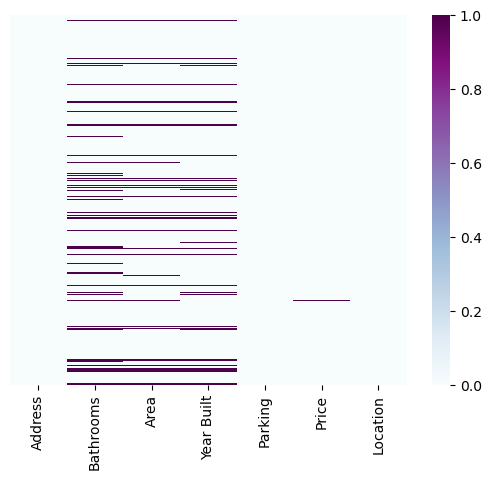

In [8]:
# check the missing values in heatmap
sns.heatmap(df_combined.isna(), yticklabels=False, cmap='BuPu')

In [9]:
# drop each line where at least 1 data point is missing
df_combined = df_combined.dropna()

In [10]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 0 to 37
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Address     340 non-null    object 
 1   Bathrooms   340 non-null    object 
 2   Area        340 non-null    object 
 3   Year Built  340 non-null    float64
 4   Parking     340 non-null    object 
 5   Price       340 non-null    object 
 6   Location    340 non-null    object 
dtypes: float64(1), object(6)
memory usage: 21.2+ KB


### Reset/Change index

In [11]:
# index is useful if you need to reference the row (to drop for example)
df_combined = df_combined.reset_index(drop=True)
df_combined

,Address,Bathrooms,Area,Year Built,Parking,Price,Location
0,1203 Sarabeth Way,3 Baths,"1,657 sqft",2021.0,1 Car Garage,"$720,000",Austin
1,1129 Walton Ln #2,3 Baths,"1,094 sqft",2024.0,No Info,"$685,000",Austin
2,1129 Walton Ln #1,3 Baths,"1,814 sqft",2024.0,Garage,"$975,000",Austin
3,1406 Windsor Rd #203,1 Bath,856 sqft,1982.0,No Info,"$410,000",Austin
4,200 Congress Ave #32SE,3 Baths,"2,082 sqft",2008.0,2 Car Garage,"$3,395,000",Austin
...,...,...,...,...,...,...,...
335,Bahia Plan in Texas Heights by Esperanza Homes,2 Baths,"1,911 sqft",2024.0,Garage,"$223,990+",Weslaco
336,704 Juan Seguin St,2 Baths,"1,781 sqft",2024.0,2 Car Garage,"$292,000",Weslaco
337,Solano Plan in Texas Heights by Esperanza Homes,2 Baths,"2,177 sqft",2024.0,Garage,"$242,990+",Weslaco
338,2005 Alexandra Dr,6 Baths,"5,267 sqft (on 0.51 acres)",2005.0,3 Car Garage,"$625,000",Weslaco


### Check for duplicates

In [12]:
# check for duplicates
df_combined.duplicated().sum()


# if there was duplicates this would show them
# df_combined.loc[df_combined.duplicated(), :]
# this would remove them
#df_combined = df_combined.drop_duplicates()
# reset the index
#df_combined = df_combined.reset_index(drop=True)

0

### Change the price column

In [13]:
# rename price column and update existing dataframe
df_combined = df_combined.rename(columns={'Price':'Price($)'})
df_combined

,Address,Bathrooms,Area,Year Built,Parking,Price($),Location
0,1203 Sarabeth Way,3 Baths,"1,657 sqft",2021.0,1 Car Garage,"$720,000",Austin
1,1129 Walton Ln #2,3 Baths,"1,094 sqft",2024.0,No Info,"$685,000",Austin
2,1129 Walton Ln #1,3 Baths,"1,814 sqft",2024.0,Garage,"$975,000",Austin
3,1406 Windsor Rd #203,1 Bath,856 sqft,1982.0,No Info,"$410,000",Austin
4,200 Congress Ave #32SE,3 Baths,"2,082 sqft",2008.0,2 Car Garage,"$3,395,000",Austin
...,...,...,...,...,...,...,...
335,Bahia Plan in Texas Heights by Esperanza Homes,2 Baths,"1,911 sqft",2024.0,Garage,"$223,990+",Weslaco
336,704 Juan Seguin St,2 Baths,"1,781 sqft",2024.0,2 Car Garage,"$292,000",Weslaco
337,Solano Plan in Texas Heights by Esperanza Homes,2 Baths,"2,177 sqft",2024.0,Garage,"$242,990+",Weslaco
338,2005 Alexandra Dr,6 Baths,"5,267 sqft (on 0.51 acres)",2005.0,3 Car Garage,"$625,000",Weslaco


In [14]:
# remove $ from prices
df_combined['Price($)'] = df_combined['Price($)'].str.strip('$')
df_combined

,Address,Bathrooms,Area,Year Built,Parking,Price($),Location
0,1203 Sarabeth Way,3 Baths,"1,657 sqft",2021.0,1 Car Garage,"720,000",Austin
1,1129 Walton Ln #2,3 Baths,"1,094 sqft",2024.0,No Info,"685,000",Austin
2,1129 Walton Ln #1,3 Baths,"1,814 sqft",2024.0,Garage,"975,000",Austin
3,1406 Windsor Rd #203,1 Bath,856 sqft,1982.0,No Info,"410,000",Austin
4,200 Congress Ave #32SE,3 Baths,"2,082 sqft",2008.0,2 Car Garage,"3,395,000",Austin
...,...,...,...,...,...,...,...
335,Bahia Plan in Texas Heights by Esperanza Homes,2 Baths,"1,911 sqft",2024.0,Garage,"223,990+",Weslaco
336,704 Juan Seguin St,2 Baths,"1,781 sqft",2024.0,2 Car Garage,"292,000",Weslaco
337,Solano Plan in Texas Heights by Esperanza Homes,2 Baths,"2,177 sqft",2024.0,Garage,"242,990+",Weslaco
338,2005 Alexandra Dr,6 Baths,"5,267 sqft (on 0.51 acres)",2005.0,3 Car Garage,"625,000",Weslaco


In [15]:
# remove , in price
df_combined['Price($)'] = df_combined['Price($)'].str.replace(',', '')
df_combined

,Address,Bathrooms,Area,Year Built,Parking,Price($),Location
0,1203 Sarabeth Way,3 Baths,"1,657 sqft",2021.0,1 Car Garage,720000,Austin
1,1129 Walton Ln #2,3 Baths,"1,094 sqft",2024.0,No Info,685000,Austin
2,1129 Walton Ln #1,3 Baths,"1,814 sqft",2024.0,Garage,975000,Austin
3,1406 Windsor Rd #203,1 Bath,856 sqft,1982.0,No Info,410000,Austin
4,200 Congress Ave #32SE,3 Baths,"2,082 sqft",2008.0,2 Car Garage,3395000,Austin
...,...,...,...,...,...,...,...
335,Bahia Plan in Texas Heights by Esperanza Homes,2 Baths,"1,911 sqft",2024.0,Garage,223990+,Weslaco
336,704 Juan Seguin St,2 Baths,"1,781 sqft",2024.0,2 Car Garage,292000,Weslaco
337,Solano Plan in Texas Heights by Esperanza Homes,2 Baths,"2,177 sqft",2024.0,Garage,242990+,Weslaco
338,2005 Alexandra Dr,6 Baths,"5,267 sqft (on 0.51 acres)",2005.0,3 Car Garage,625000,Weslaco


### Change area column

In [16]:
# rename area column
df_combined = df_combined.rename(columns={'Area':'Area(sqft)'})


In [17]:
# remove , in area
df_combined['Area(sqft)'] = df_combined['Area(sqft)'].str.replace(',', '')
df_combined

,Address,Bathrooms,Area(sqft),Year Built,Parking,Price($),Location
0,1203 Sarabeth Way,3 Baths,1657 sqft,2021.0,1 Car Garage,720000,Austin
1,1129 Walton Ln #2,3 Baths,1094 sqft,2024.0,No Info,685000,Austin
2,1129 Walton Ln #1,3 Baths,1814 sqft,2024.0,Garage,975000,Austin
3,1406 Windsor Rd #203,1 Bath,856 sqft,1982.0,No Info,410000,Austin
4,200 Congress Ave #32SE,3 Baths,2082 sqft,2008.0,2 Car Garage,3395000,Austin
...,...,...,...,...,...,...,...
335,Bahia Plan in Texas Heights by Esperanza Homes,2 Baths,1911 sqft,2024.0,Garage,223990+,Weslaco
336,704 Juan Seguin St,2 Baths,1781 sqft,2024.0,2 Car Garage,292000,Weslaco
337,Solano Plan in Texas Heights by Esperanza Homes,2 Baths,2177 sqft,2024.0,Garage,242990+,Weslaco
338,2005 Alexandra Dr,6 Baths,5267 sqft (on 0.51 acres),2005.0,3 Car Garage,625000,Weslaco


In [18]:
# remove sqft from column
df_combined['Area(sqft)'] = df_combined['Area(sqft)'].str.split(' ').str[0]
df_combined

,Address,Bathrooms,Area(sqft),Year Built,Parking,Price($),Location
0,1203 Sarabeth Way,3 Baths,1657,2021.0,1 Car Garage,720000,Austin
1,1129 Walton Ln #2,3 Baths,1094,2024.0,No Info,685000,Austin
2,1129 Walton Ln #1,3 Baths,1814,2024.0,Garage,975000,Austin
3,1406 Windsor Rd #203,1 Bath,856,1982.0,No Info,410000,Austin
4,200 Congress Ave #32SE,3 Baths,2082,2008.0,2 Car Garage,3395000,Austin
...,...,...,...,...,...,...,...
335,Bahia Plan in Texas Heights by Esperanza Homes,2 Baths,1911,2024.0,Garage,223990+,Weslaco
336,704 Juan Seguin St,2 Baths,1781,2024.0,2 Car Garage,292000,Weslaco
337,Solano Plan in Texas Heights by Esperanza Homes,2 Baths,2177,2024.0,Garage,242990+,Weslaco
338,2005 Alexandra Dr,6 Baths,5267,2005.0,3 Car Garage,625000,Weslaco


### Bathrooms

In [19]:
# remove baths from column
df_combined['Bathrooms'] = df_combined['Bathrooms'].str.strip(' Baths')
df_combined

,Address,Bathrooms,Area(sqft),Year Built,Parking,Price($),Location
0,1203 Sarabeth Way,3,1657,2021.0,1 Car Garage,720000,Austin
1,1129 Walton Ln #2,3,1094,2024.0,No Info,685000,Austin
2,1129 Walton Ln #1,3,1814,2024.0,Garage,975000,Austin
3,1406 Windsor Rd #203,1,856,1982.0,No Info,410000,Austin
4,200 Congress Ave #32SE,3,2082,2008.0,2 Car Garage,3395000,Austin
...,...,...,...,...,...,...,...
335,Bahia Plan in Texas Heights by Esperanza Homes,2,1911,2024.0,Garage,223990+,Weslaco
336,704 Juan Seguin St,2,1781,2024.0,2 Car Garage,292000,Weslaco
337,Solano Plan in Texas Heights by Esperanza Homes,2,2177,2024.0,Garage,242990+,Weslaco
338,2005 Alexandra Dr,6,5267,2005.0,3 Car Garage,625000,Weslaco


### Parking yes/no

In [20]:
df_combined['Parking'].value_counts()

Garage              151
2 Car Garage         91
No Info              45
3 Car Garage         14
1 Car Garage         12
2 Carport Spaces      8
1 Carport Spaces      7
None                  3
Attached Garage       2
4 Car Garage          2
1 Parking Spaces      2
Open Parking          2
4 Carport Spaces      1
Name: Parking, dtype: int64

In [21]:
# if you run it once and then try to save it you already changed the values so they will end up all returning no
df_combined['Parking'] = df_combined['Parking'].apply(lambda x: 'yes' if 'Garage' in x or 'Carport' in x or 'Car' in x or 'Space' in x
                            else 'no')
df_combined

,Address,Bathrooms,Area(sqft),Year Built,Parking,Price($),Location
0,1203 Sarabeth Way,3,1657,2021.0,yes,720000,Austin
1,1129 Walton Ln #2,3,1094,2024.0,no,685000,Austin
2,1129 Walton Ln #1,3,1814,2024.0,yes,975000,Austin
3,1406 Windsor Rd #203,1,856,1982.0,no,410000,Austin
4,200 Congress Ave #32SE,3,2082,2008.0,yes,3395000,Austin
...,...,...,...,...,...,...,...
335,Bahia Plan in Texas Heights by Esperanza Homes,2,1911,2024.0,yes,223990+,Weslaco
336,704 Juan Seguin St,2,1781,2024.0,yes,292000,Weslaco
337,Solano Plan in Texas Heights by Esperanza Homes,2,2177,2024.0,yes,242990+,Weslaco
338,2005 Alexandra Dr,6,5267,2005.0,yes,625000,Weslaco


### Convert all numbers to integers

In [22]:
# check if bathrooms column is a numeric element
is_numeric_dtype (df_combined['Bathrooms'])

False

In [23]:
# check if bathrooms column is a string element
is_string_dtype (df_combined['Bathrooms'])

True

In [24]:
df_combined['Bathrooms'] = df_combined['Bathrooms'].astype(int)

In [25]:
df_combined['Area(sqft)'] = df_combined['Area(sqft)'].astype(int)

In [26]:
df_combined['Year Built'] = df_combined['Year Built'].astype(int)

In [27]:
df_combined['Price($)'] = df_combined['Price($)'].apply(lambda x: x.replace('+', '') if '+' in x else x)

In [28]:
df_combined['Price($)'] = df_combined['Price($)'].astype(int)
is_numeric_dtype (df_combined['Price($)'])

True

### New column price/sqft

In [31]:
df_combined['price/sqft'] = df_combined['Price($)']/df_combined['Area(sqft)']

# round the result
df_combined['price/sqft'] = df_combined['price/sqft'].round(2)
df_combined

,Address,Bathrooms,Area(sqft),Year Built,Parking,Price($),Location,price/sqft
0,1203 Sarabeth Way,3,1657,2021,yes,720000,Austin,434.52
1,1129 Walton Ln #2,3,1094,2024,no,685000,Austin,626.14
2,1129 Walton Ln #1,3,1814,2024,yes,975000,Austin,537.49
3,1406 Windsor Rd #203,1,856,1982,no,410000,Austin,478.97
4,200 Congress Ave #32SE,3,2082,2008,yes,3395000,Austin,1630.64
...,...,...,...,...,...,...,...,...
335,Bahia Plan in Texas Heights by Esperanza Homes,2,1911,2024,yes,223990,Weslaco,117.21
336,704 Juan Seguin St,2,1781,2024,yes,292000,Weslaco,163.95
337,Solano Plan in Texas Heights by Esperanza Homes,2,2177,2024,yes,242990,Weslaco,111.62
338,2005 Alexandra Dr,6,5267,2005,yes,625000,Weslaco,118.66


### Check for outliers

In [32]:
# get summary of data
df_combined['price/sqft'].describe()

count     340.000000
mean      244.547647
std       167.663963
min        82.560000
25%       163.345000
50%       189.875000
75%       271.620000
max      1630.640000
Name: price/sqft, dtype: float64

In [35]:
# Evaluating min range
df_combined.loc[df_combined['price/sqft'] < 90]

,Address,Bathrooms,Area(sqft),Year Built,Parking,Price($),Location,price/sqft
88,4814 Jean St,2,1846,1955,yes,159000,Corpus Christi,86.13
158,3911 N Salinas St,3,1936,1991,no,165000,Edinburg,85.23
197,15639 Weldon Dr,1,969,1981,no,80000,Houston,82.56
270,3809 E SONGBIRD,2,2684,1967,yes,225000,San Antonio,83.83


In [37]:
# Evaluating max range
df_combined.loc[df_combined['price/sqft'] > 1000]

,Address,Bathrooms,Area(sqft),Year Built,Parking,Price($),Location,price/sqft
4,200 Congress Ave #32SE,3,2082,2008,yes,3395000,Austin,1630.64
6,1708 Hether St,5,3615,2016,yes,3675000,Austin,1016.60
121,2555 N Pearl St #1701,3,2490,2009,yes,2900000,Dallas,1164.66
141,7807 W Lovers Ln,2,1370,1945,yes,1425000,Dallas,1040.15


### Save in Excel

In [39]:
df_combined.to_excel('cleaned_data.xlsx', index=False)